
# Correlation of World Happiness - Map

In [3]:
#Initialize Tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import math
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Creating wold map of happiness for 2023

In [4]:
#set sns style
sns.set_style("whitegrid")

In [5]:
Happiness2023 = pd.read_csv("Resources/2023.csv")

<Axes: >

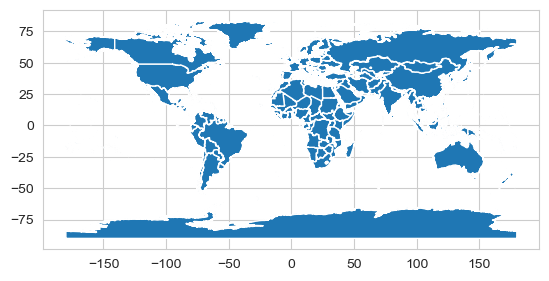

In [6]:
map_df = gpd.read_file('Resources/ne_10m_admin_0_countries.shp')
map_df.plot()

In [5]:
#for col in map_df:
#     print(col)

In [6]:
#map_df = map_df.replace({'Russian Federation':'Russia',
#                        'Trinidad and Tobago': 'Trinidad & Tobago',
#                        "Côte d'Ivoire": 'Ivory Coast',
#                        'Congo': 'Congo (Brazzaville)',
#                        'Congo DRC':'Congo (Kinshasa)',
#                        'Palestinian Territory':'Palestinian Territories'})
map_df

featurecla  scalerank  LABELRANK                        SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL               TYPE   TLC                                 ADMIN ADM0_A3  GEOU_DIF                               GEOUNIT GU_A3  SU_DIF                               SUBUNIT SU_A3  BRK_DIFF                           NAME                             NAME_LONG BRK_A3                          BRK_NAME          BRK_GROUP            ABBREV POSTAL                                          FORMAL_EN                           FORMAL_FR                                     NAME_CIAWF         NOTE_ADM0                                           NOTE_BRK                             NAME_SORT             NAME_ALT  MAPCOLOR7  MAPCOLOR8  MAPCOLOR9  MAPCOLOR13       POP_EST  POP_RANK  POP_YEAR    GDP_MD  GDP_YEAR                     ECONOMY               INCOME_GRP FIPS_10 ISO_A2 ISO_A2_EH ISO_A3 ISO_A3_EH ISO_N3 ISO_N3_EH UN_A3 WB_A2 WB_A3    WOE_ID  WOE_ID_EH  \
0    Admin-0 country          0          2                         Indonesia    IDN         0      2  Sovereign country     1                             Indonesia     IDN         0                             Indonesia   IDN       0                             Indonesia   IDN         0                      Indonesia                             Indonesia    IDN                         Indonesia               None             Indo.   INDO                              Republic of Indonesia                                None                                      Indonesia              None                                               None                             Indonesia                 None          6          6          6          11  2.706256e+08        17      2019   1119190      2019    4. Emerging region: MIKT   4. Lower middle income      ID     ID        ID    IDN       IDN    360       360   360    ID   IDN  23424846   23424846   
1    Admin-0 country          0          3                          Malaysia    MYS         0      2  Sovereign country     1                              Malaysia     MYS         0                              Malaysia   MYS       0                              Malaysia   MYS         0                       Malaysia                              Malaysia    MYS                          Malaysia               None            Malay.     MY                                           Malaysia                                None                                       Malaysia              None                                               None                              Malaysia                 None          2          4          3           6  3.194978e+07        15      2019    364681      2019        6. Developing region   3. Upper middle income      MY     MY        MY    MYS       MYS    458       458   458    MY   MYS  23424901   23424901   
2    Admin-0 country          0          2                             Chile    CHL         0      2  Sovereign country     1                                 Chile     CHL         0                                 Chile   CHL       0                                 Chile   CHL         0                          Chile                                 Chile    CHL                             Chile               None             Chile     CL                                  Republic of Chile                                None                                          Chile              None                                               None                                 Chile                 None          5          1          5           9  1.895204e+07        14      2019    282318      2019     5. Emerging region: G20   3. Upper middle income      CI     CL        CL    CHL       CHL    152       152   152    CL   CHL  23424782   23424782   
3    Admin-0 country          0          3                           Bolivia    BOL         0      2  Sovereign country     1                               Bolivia     BOL         0 

In [12]:
#map_df = map_df.drop(map_df[map_df['TYPE'] == 'Indeterminate'].index)
#map_df = map_df.drop(map_df[map_df['TYPE'] == 'Dependency'].index)
#map_df = map_df.drop(map_df[map_df['TYPE'] == 'Disputed'].index)

#map_df = (map_df[map_df['NOTE_ADM0'] == 'None'].index)
#map_df

In [13]:
#mapcountry_clean = ['None']
#mask = map_df['NOTE_ADM0'].isin(mapcountry_clean)
#mapcountry_clean = map_df[mask]
#print(mapcountry_clean)


In [7]:
Happiness2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   iso alpha                                   137 non-null    object 
 2   Regional indicator                          137 non-null    object 
 3   Happiness score                             137 non-null    float64
 4   Standard error of ladder score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   Logged GDP per capita                       137 non-null    float64
 8   Social support                              137 non-null    float64
 9   Healthy life expectancy                     136 non-null    float64
 10  Freedom to mak

In [8]:
Happiness2023 = Happiness2023.rename(index = str, columns = {'Country name': "Country", 'Happiness score': "Score"})
Happiness2023map = Happiness2023[['Country', 'Score']]

Happiness2023map

Country  Score
0                  Afghanistan  1.859
1                      Albania  5.277
2                      Algeria  5.329
3                    Argentina  6.024
4                      Armenia  5.342
5                    Australia  7.095
6                      Austria  7.097
7                      Bahrain  6.173
8                   Bangladesh  4.282
9                      Belgium  6.859
10                       Benin  4.374
11                     Bolivia  5.684
12      Bosnia and Herzegovina  5.633
13                    Botswana  3.435
14                      Brazil  6.125
15                    Bulgaria  5.466
16                Burkina Faso  4.638
17                    Cambodia  4.393
18                    Cameroon  4.973
19                      Canada  6.961
20                        Chad  4.397
21                       Chile  6.334
22                       China  5.818
23                    Colombia  5.630
24                     Comoros  3.545
25         Congo (Brazzaville)  5.267
26            Congo (Kinshasa)  3.207
27                  Costa Rica  6.609
28                     Croatia  6.125
29                      Cyprus  6.130
30                     Czechia  6.845
31                     Denmark  7.586
32          Dominican Republic  5.569
33                     Ecuador  5.559
34                       Egypt  4.170
35                 El Salvador  6.122
36                     Estonia  6.455
37                    Ethiopia  4.091
38                     Finland  7.804
39                      France  6.661
40                       Gabon  5.035
41                      Gambia  4.279
42                     Georgia  5.109
43                     Germany  6.892
44                       Ghana  4.605
45                      Greece  5.931
46                   Guatemala  6.150
47                      Guinea  5.072
48                    Honduras  6.023
49   Hong Kong S.A.R. of China  5.308
50                     Hungary  6.041
51                     Iceland  7.530
52                       India  4.036
53                   Indonesia  5.277
54                        Iran  4.876
55                        Iraq  4.941
56                     Ireland  6.911
57                      Israel  7.473
58                       Italy  6.405
59                 Ivory Coast  5.053
60                     Jamaica  5.703
61                       Japan  6.129
62                      Jordan  4.120
63                  Kazakhstan  6.144
64                       Kenya  4.487
65                      Kosovo  6.368
66                  Kyrgyzstan  5.825
67                        Laos  5.111
68                      Latvia  6.213
69                     Lebanon  2.392
70                     Liberia  4.042
71                   Lithuania  6.763
72                  Luxembourg  7.228
73                  Madagascar  4.019
74                      Malawi  3.495
75                    Malaysia  6.012
76                        Mali  4.198
77                       Malta  6.300
78                  Mauritania  4.724
79                   Mauritius  5.902
80                      Mexico  6.330
81                     Moldova  5.819
82                    Mongolia  5.840
83                  Montenegro  5.722
84                     Morocco  4.903
85                  Mozambique  4.954
86                     Myanmar  4.372
87                     Namibia  4.631
88                       Nepal  5.360
89                 Netherlands  7.403
90                 New Zealand  7.123
91                   Nicaragua  6.259
92                       Niger  4.501
93                     Nigeria  4.981
94             North Macedonia  5.254
95                      Norway  7.315
96                    Pakistan  4.555
97                      Panama  6.265
98                    Paraguay  5.738
99                        Peru  5.526
100                Philippines  5.523
101                     Poland  6.260
102                   Portugal  5.968
103                    Romania  6.589
104                     Russia  5

In [ ]:
data_2019 = data_2019.rename(index = str, columns = {'Country or region':"Country"})
df = data_2019[['Country','Score']]

df.head(5)

In [9]:
merged = map_df.set_index('COUNTRY').join(df.set_index('Country'))

merged.head(5)

KeyError: "None of ['COUNTRY'] are in the columns"

In [10]:
merged = map_df.set_index('SOVEREIGNT').join(Happiness2023map.set_index('Country'))

merged


featurecla  scalerank  LABELRANK SOV_A3  ADM0_DIF  LEVEL               TYPE   TLC                                 ADMIN ADM0_A3  GEOU_DIF                               GEOUNIT GU_A3  SU_DIF                               SUBUNIT SU_A3  BRK_DIFF                           NAME                             NAME_LONG BRK_A3                          BRK_NAME          BRK_GROUP            ABBREV POSTAL                                          FORMAL_EN                           FORMAL_FR                                     NAME_CIAWF         NOTE_ADM0                                           NOTE_BRK                             NAME_SORT             NAME_ALT  MAPCOLOR7  MAPCOLOR8  MAPCOLOR9  MAPCOLOR13       POP_EST  POP_RANK  POP_YEAR    GDP_MD  GDP_YEAR                     ECONOMY               INCOME_GRP FIPS_10 ISO_A2 ISO_A2_EH ISO_A3 ISO_A3_EH ISO_N3 ISO_N3_EH UN_A3 WB_A2 WB_A3    WOE_ID  WOE_ID_EH  \
SOVEREIGNT                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Afghanistan                       Admin-0 country          0          3    AFG         0      2  Sovereign country     1                           Afghanistan     AFG         0                           Afghanistan   AFG       0                           Afghanistan   AFG         0                    Afghanistan                           Afghanistan    AFG                       Afghanistan               None              Afg.     AF                       Islamic State of Afghanistan                                None                                    Afghanistan              None                                               None                           Afghanistan                 None          5          6          8           7  3.804175e+07        15      2019     19291      2019   7. Least developed region            5. Low income      AF     AF        AF    AFG       AFG    004       004   004    AF   AFG  23424739   23424739   
Albania                           Admin-0 country          0          6    ALB         0      2  Sovereign country     1                               Albania     ALB         0                               Albania   ALB       0                               Albania   ALB         0                        Albania                               Albania    ALB                           Albania               None              Alb.     AL                                Republic of Albania                                None                                        Albania              None                                               None                               Albania                 None          1          4          1           6  2.854191e+06        12      2019     15279      2019        6. Developing region   4. Lower middle income      AL     AL        AL    ALB       ALB    008       008   008    AL   ALB  23424742   23424742   
Algeria                           Admin-0 country          0          3    DZA         0      2  Sovereign country     1                               Algeria     DZA         0                               Algeria   DZA       0   

In [ ]:
print(merged.Score.isnull().sum())

In [20]:
Happiness2023map = Happiness2023map.set_index('Country').T.to_dict('list')
Happiness2023map

{'Afghanistan': [1.859],
 'Albania': [5.277],
 'Algeria': [5.329],
 'Argentina': [6.024],
 'Armenia': [5.342],
 'Australia': [7.095],
 'Austria': [7.097],
 'Bahrain': [6.173],
 'Bangladesh': [4.282],
 'Belgium': [6.859],
 'Benin': [4.374],
 'Bolivia': [5.684],
 'Bosnia and Herzegovina': [5.633],
 'Botswana': [3.435],
 'Brazil': [6.125],
 'Bulgaria': [5.466],
 'Burkina Faso': [4.638],
 'Cambodia': [4.393],
 'Cameroon': [4.973],
 'Canada': [6.961],
 'Chad': [4.397],
 'Chile': [6.334],
 'China': [5.818],
 'Colombia': [5.63],
 'Comoros': [3.545],
 'Congo (Brazzaville)': [5.267],
 'Congo (Kinshasa)': [3.207],
 'Costa Rica': [6.609],
 'Croatia': [6.125],
 'Cyprus': [6.13],
 'Czechia': [6.845],
 'Denmark': [7.586],
 'Dominican Republic': [5.569],
 'Ecuador': [5.559],
 'Egypt': [4.17],
 'El Salvador': [6.122],
 'Estonia': [6.455],
 'Ethiopia': [4.091],
 'Finland': [7.804],
 'France': [6.661],
 'Gabon': [5.035],
 'Gambia': [4.279],
 'Georgia': [5.109],
 'Germany': [6.892],
 'Ghana': [4.605],
 '

In [21]:
variable = 'Score'
vmin, vmax = 1.7, 8

<Axes: >

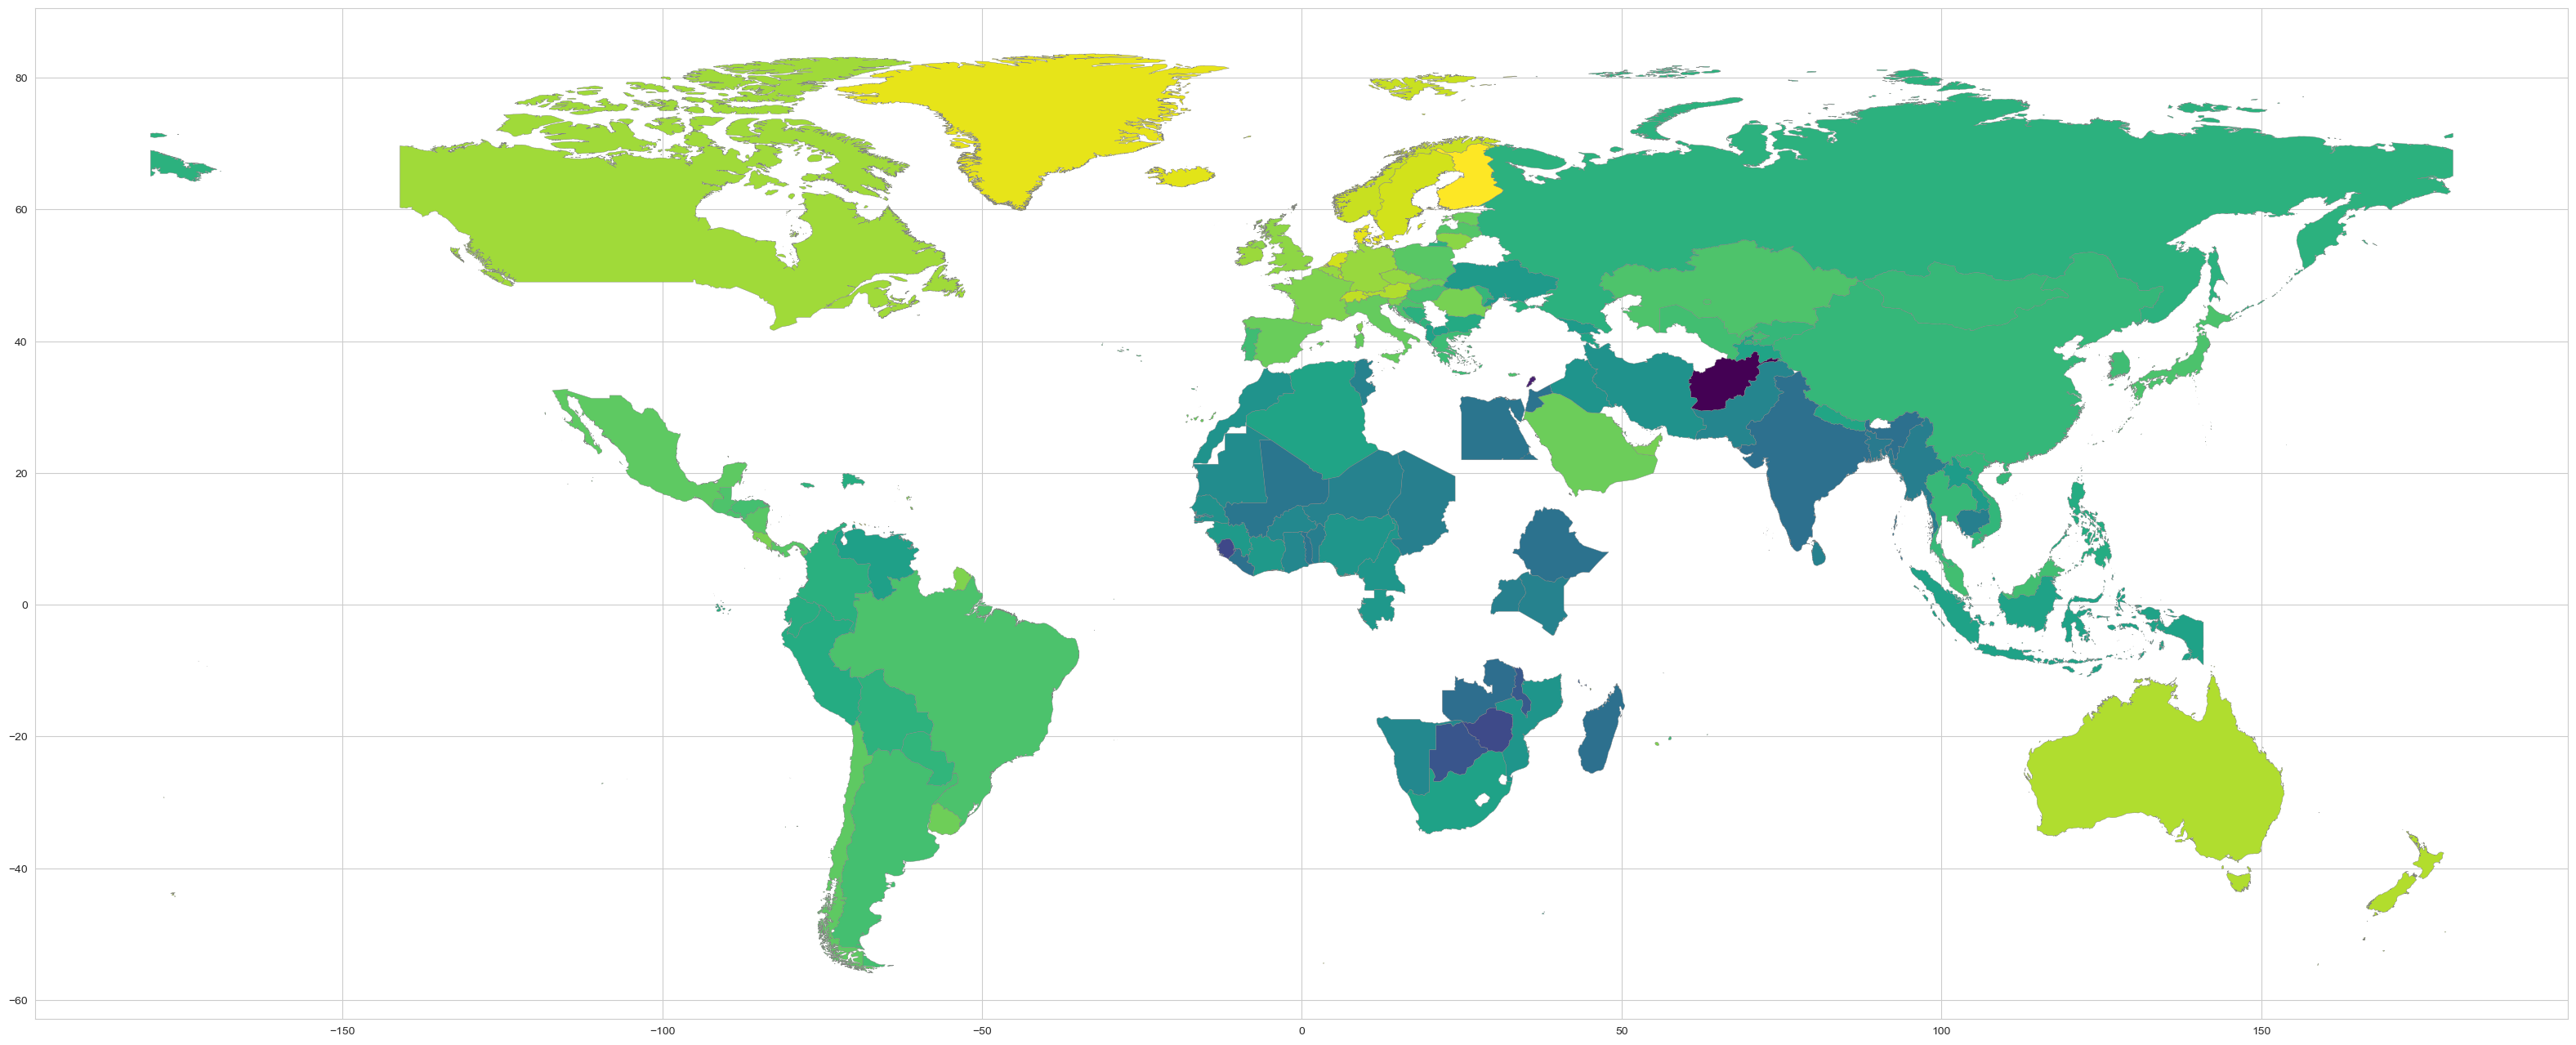

In [22]:
fig,ax = plt.subplots(1,figsize = (40,24))

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax, edgecolor = '0.5')

In [ ]:
fig,ax = plt.subplots(1,figsize = (40,24))

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.5')

ax.axis('off')

ax.set_title('World Happiness Score',fontdict = {'fontsize':'40'})


sm = plt.cm.ScalarMappable(cmap='viridis',norm = plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.5')

In [ ]:
Happiness2023map.to_csv('Happiness2023_map.csv')

In [ ]:
merged.to_csv('merged.csv', index=False)